In [30]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from model.v1 import Model

model = Model()
ckpt = torch.load('./ckpt/best.pth')
model.load_state_dict(ckpt)
model.eval()
print('model loaded')

model loaded


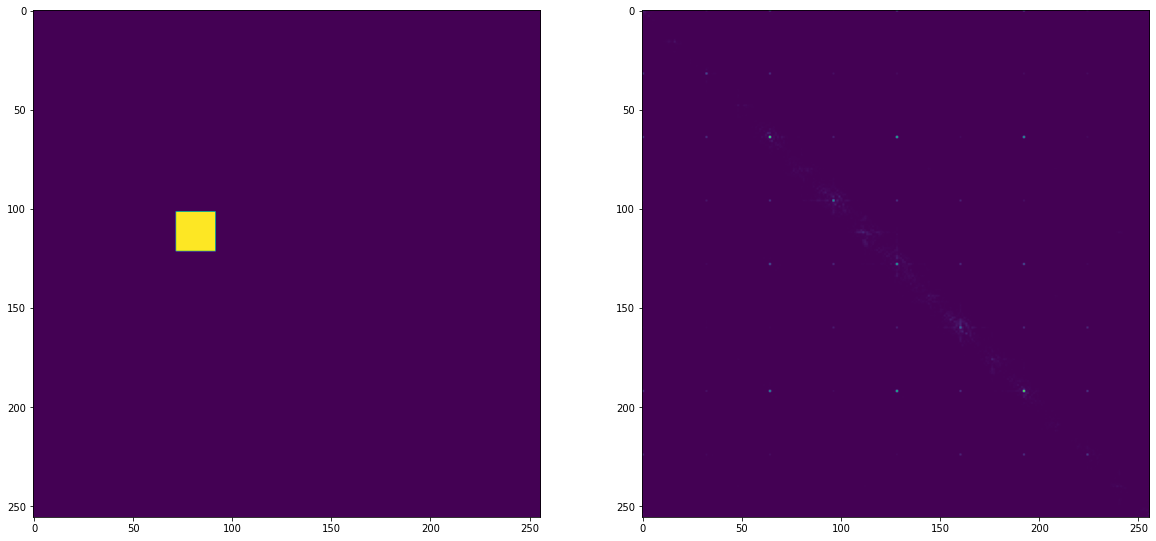

In [31]:
input = torch.zeros([1, 1, 256, 256])
cx = random.randint(50, 206)
cy = random.randint(50, 206)
input[0, 0, cx-10:cx+10, cy-10:cy+10] = 1.0
phase, image_norm, image_fft = model(input)

plt.figure(figsize=(20,10))
ax1 = plt.subplot(121)
plt.imshow(image_norm[0,0])
ax1 = plt.subplot(122)
plt.imshow(image_fft[0,0].detach().numpy())
plt.show()

In [7]:
img = cv2.imread('./data_1/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (20, 20))
img = np.array(img)
img = img.astype(np.float32)
input = torch.zeros([1,1,256,256])
input[0,0,118:138,118:138] = torch.tensor(img)
phase, image_norm, image_fft = model(input)


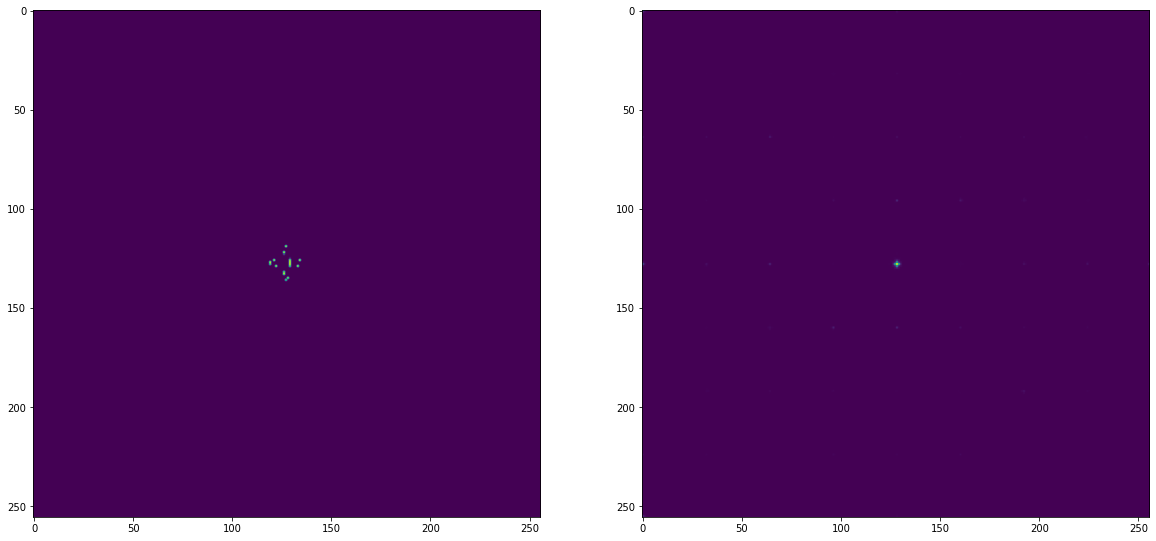

In [8]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(121)
plt.imshow(image_norm[0,0])
ax1 = plt.subplot(122)
plt.imshow(image_fft[0,0].detach().numpy())
plt.show()